Dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Os dados são de uma pesquisa de satisfação feita com passageiros de companhias aéreas. São feitas perguntas como assento confortável, comidas e bebidas, serviço durante o vôo, entre outras. Assim foi proposto um modelo de classificação, onde através das features que tinham maior e menor correlação, fosse possível classificar a satisfação ou não do cliente. 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
import xgboost as xgb

In [115]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [116]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Tratamento de Dados

In [118]:
#visualizando dados nulos

df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [119]:
#Preenchendo valores nulos com a média

media = df['Arrival Delay'].mean()
df['Arrival Delay'].fillna(media, inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [121]:
# VAlores Duplicados

df.duplicated().sum()

0

In [122]:
#Transformando dados categóricos em numéricos

lbl=preprocessing.LabelEncoder()
clms=['Gender', 'Customer Type', 'Type of Travel', 'Class', "Satisfaction"]
for x in clms:
    df[x]=lbl.fit_transform(df[x])

In [123]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


## Visualizando Correlação

<AxesSubplot:>

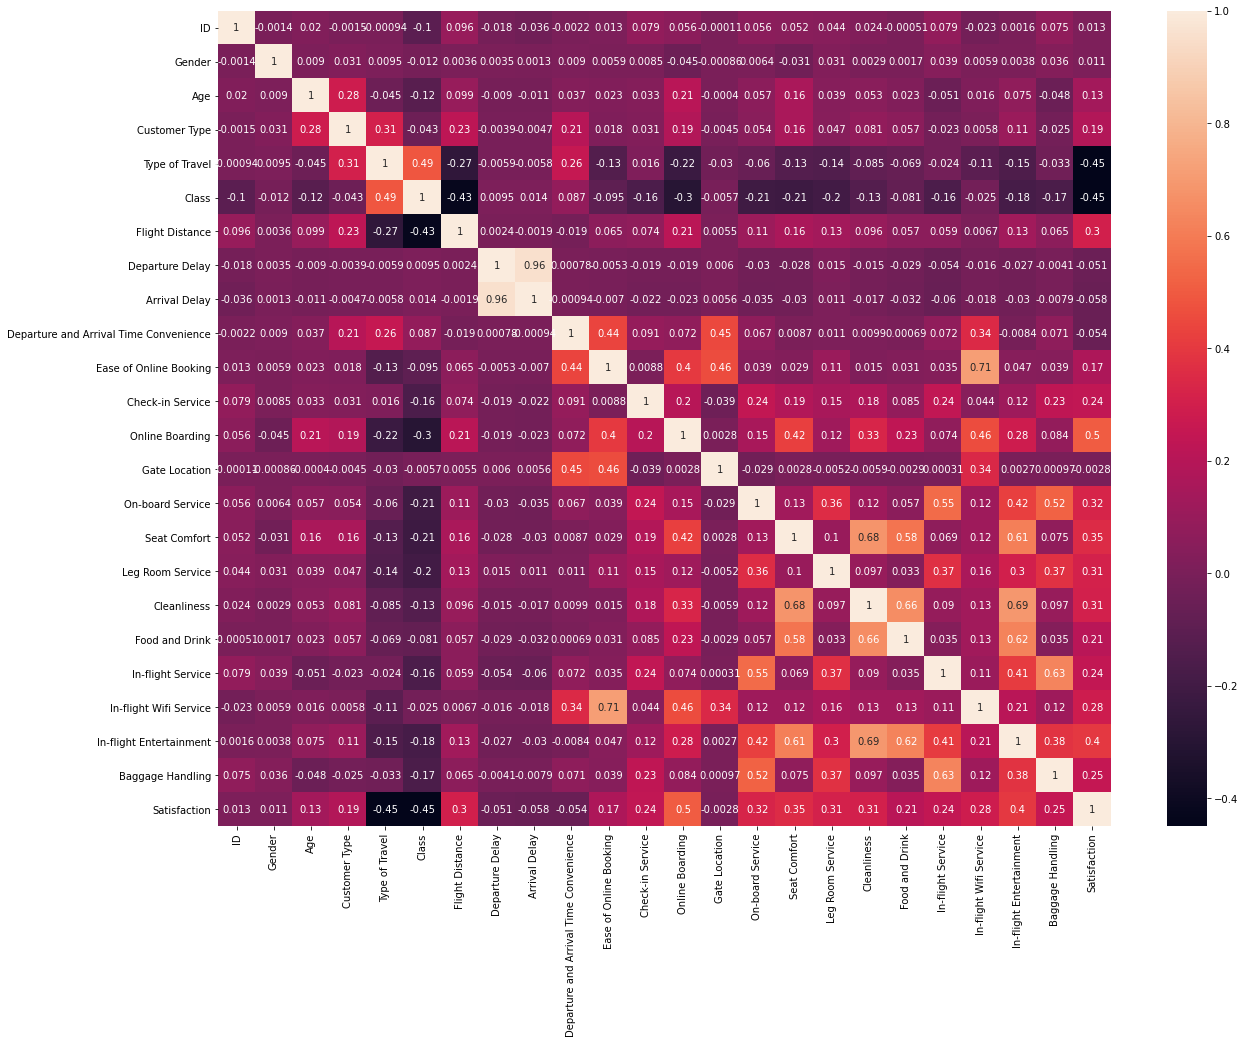

In [124]:
# Gráfico de Correlação

corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

In [125]:
# drop de colunas sem COrrelação

df.drop(labels=(['Departure Delay','Arrival Delay']),axis=1,inplace=True)

In [126]:
# data frame de colunas que tem correlação com 'Satisfaction'

corr = pd.DataFrame(df.corr()['Satisfaction']).drop('Satisfaction',axis=0).sort_values(by = 'Satisfaction',ascending=False)

In [222]:
# Selecionando colunas para moddelo, com correlação negativa menor que -0.1 e maior que 0.1

feature_columns = []

for x in corr.index:
    if corr.loc[x].values < -0.1:
        feature_columns.append(x)
    elif corr.loc[x].values > 0.1:
        feature_columns.append(x)
        
feature_columns  

['Online Boarding',
 'In-flight Entertainment',
 'Seat Comfort',
 'On-board Service',
 'Leg Room Service',
 'Cleanliness',
 'Flight Distance',
 'In-flight Wifi Service',
 'Baggage Handling',
 'In-flight Service',
 'Check-in Service',
 'Food and Drink',
 'Customer Type',
 'Ease of Online Booking',
 'Age',
 'Class',
 'Type of Travel']

In [223]:
# Separando dados alvo

X = df[feature_columns]
y = df['Satisfaction']

In [224]:
# Transoformando dados em escala dristribuição normal padrão
escala = StandardScaler()
X = pd.DataFrame(escala.fit_transform(X),columns=X.columns)

In [225]:
X

,Online Boarding,In-flight Entertainment,Seat Comfort,On-board Service,Leg Room Service,Cleanliness,Flight Distance,In-flight Wifi Service,Baggage Handling,In-flight Service,Check-in Service,Food and Drink,Customer Type,Ease of Online Booking,Age,Class,Type of Travel
0,-0.187037,1.230787,1.181428,-0.297587,-1.026310,1.304487,-0.370261,0.204090,1.159206,1.153946,0.547894,1.349867,-2.112281,0.173445,0.566960,-0.955724,-0.669366
1,1.293662,1.230787,0.423441,1.256300,1.252898,1.304487,-0.370261,-0.548166,1.159206,1.153946,-0.241883,-0.153973,0.473422,-0.539957,-0.292868,-0.955724,-0.669366
2,1.293662,-0.268414,1.181428,-0.297587,-0.266574,1.304487,-0.338179,0.956346,-0.535681,-0.545774,0.547894,1.349867,0.473422,0.886847,0.103976,-0.955724,-0.669366
3,0.553313,1.230787,1.181428,1.256300,1.252898,0.543264,0.716512,-0.548166,1.159206,1.153946,-0.241883,0.597947,0.473422,-0.539957,0.699242,-0.955724,-0.669366
4,1.293662,-0.268414,0.423441,-0.297587,0.493162,1.304487,2.285515,0.204090,-0.535681,-0.545774,-0.241883,0.597947,0.473422,0.173445,0.633101,-0.955724,-0.669366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.553313,0.481186,-1.850520,1.256300,0.493162,0.543264,-0.745218,0.956346,0.311762,1.153946,0.547894,0.597947,0.473422,0.886847,-0.755852,2.262940,1.493951
129876,-0.187037,-1.018015,-1.092533,1.256300,1.252898,-0.979180,-0.884573,0.204090,1.159206,0.304086,1.337671,-0.905894,0.473422,0.173445,0.103976,2.262940,1.493951
129877,-0.927386,-0.268414,-0.334546,-0.297587,0.493162,-0.217958,-0.855499,-0.548166,1.159206,0.304086,0.547894,-0.153973,0.473422,-0.539957,0.170117,2.262940,1.493951
129878,0.553313,-0.268414,0.423441,0.479357,1.252898,-0.217958,-0.855499,1.708602,1.159206,0.304086,-0.241883,-0.153973,0.473422,0.886847,0.699242,2.262940,1.493951


In [226]:
# Separando conjunto de traino e teste

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(103904, 17)

(25976, 17)

(103904,)

(25976,)

# Modelo Base

## Regressão Logística

In [227]:
# Aplicando Regressão Logística

LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

LogisticRegression()

In [228]:
LRmodel.score(X_test,y_test)

0.8735371111795504

In [229]:
# Prevendo

LGprev = LRmodel.predict(X_test)

In [230]:
# Análise de Erros

MAE = metrics.mean_absolute_error(y_test,LGprev)
MSE = metrics.mean_squared_error(y_test,LGprev)
RMSE = np.sqrt(MSE)
print("Erro Médio Absoluto=" ,MAE)
print("Erro Quadrático Médio=" ,MSE)
print("Raiz Quadrada do Erro Médio=" ,RMSE)

Erro Médio Absoluto= 0.12646288882044965
Erro Quadrático Médio= 0.12646288882044965
Raiz Quadrada do Erro Médio= 0.3556162100079939


In [231]:
# Métricas de Avalição

accuracy = accuracy_score(y_test, LGprev)
precision = precision_score(y_test, LGprev)
recall = recall_score(y_test, LGprev)
f_score = f1_score(y_test,LGprev)
print("accuracy = %0.3f, precision = %0.3f, recall = %0.3f, f-score = %0.3f" % 
      (accuracy * 100, precision * 100, recall * 100, f_score*100))

accuracy = 87.354, precision = 87.047, recall = 83.274, f-score = 85.119


Text(0.5, 33.0, 'Predicted label')

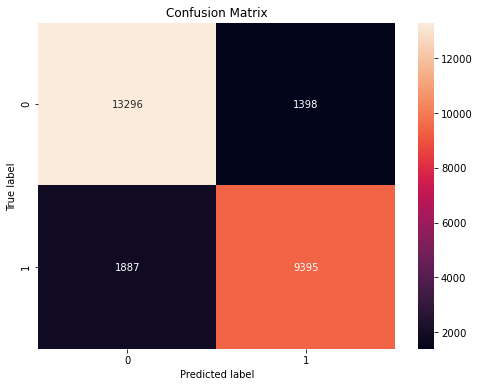

In [232]:
# Matriz de Confusão

LGcm = confusion_matrix(y_test, LGprev)
plt.figure(figsize=(8,6))
sns.heatmap(LGcm,annot=True, fmt='.20g')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [233]:
# Qual a importância de cada feature

importance = LRmodel.coef_[0]

Text(0.5, 1.0, 'Importância de cada feature')

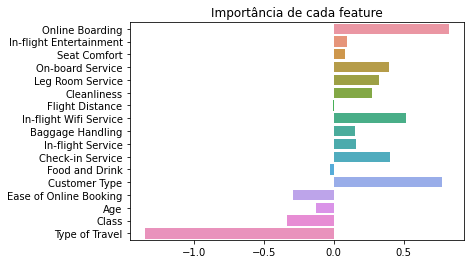

In [234]:
# Gráfico de Importância

RLimportance = pd.Series(data=importance, index=feature_columns)
sns.barplot(x=RLimportance, y=RLimportance.index, orient='h').set_title('Importância de cada feature')

# Modelos de Tentativas

## Random Forest

In [235]:
# Aplicando o modelo Random Forest

RFmodel = RandomForestClassifier()

In [236]:
# Fitando dados de treino

RFmodel.fit(X_train, y_train)

RandomForestClassifier()

In [237]:
RFmodel.score(X_test, y_test)

0.9612334462580844

In [238]:
# Prevendo

RFprev = RFmodel.predict(X_test)

In [239]:
# Análise de erros

MAE = metrics.mean_absolute_error(y_test,RFprev)
MSE = metrics.mean_squared_error(y_test,RFprev)
RMSE = np.sqrt(MSE)
print("Erro Médio Absoluto=" ,MAE)
print("Erro Quadrático Médio=" ,MSE)
print("Raiz Quadrada do Erro Médio=" ,RMSE)

Erro Médio Absoluto= 0.038766553741915614
Erro Quadrático Médio= 0.038766553741915614
Raiz Quadrada do Erro Médio= 0.19689223890726526


In [240]:
# Métricas de Avaliação

RFaccuracy = accuracy_score(y_test, RFprev)
RFprecision = precision_score(y_test, RFprev)
RFrecall = recall_score(y_test, RFprev)
RFf_score = f1_score(y_test, RFprev)
print("accuracy = %0.3f, precision = %0.3f, recall = %0.3f, f-score = %0.3f " % 
 (RFaccuracy * 100, RFprecision * 100, RFrecall * 100, RFf_score *100))

accuracy = 96.123, precision = 97.381, recall = 93.592, f-score = 95.449 


Text(0.5, 33.0, 'Predicted label')

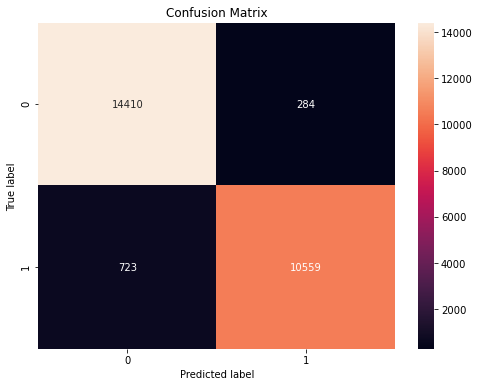

In [241]:
# Matriz de confusão

RFcm = confusion_matrix(y_test, RFprev)
plt.figure(figsize=(8,6))
sns.heatmap(RFcm,annot=True, fmt='.20g')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [242]:
# Qual a importância de cada feature

RFmodel.feature_importances_

array([0.16594042, 0.06879707, 0.04692438, 0.03293581, 0.0385191 ,
       0.02253577, 0.0458471 , 0.16207963, 0.02464437, 0.02431455,
       0.02607085, 0.01110705, 0.03985778, 0.03890018, 0.03857477,
       0.1110095 , 0.10194165])

Text(0.5, 1.0, 'Importância de cada feature')

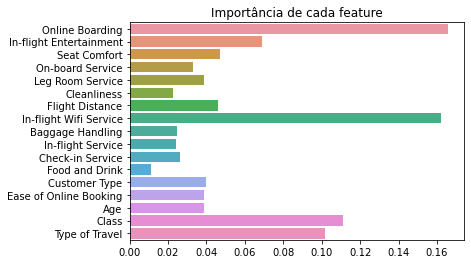

In [243]:
# Gráfico de Importância

RFimportances = pd.Series(data=RFmodel.feature_importances_, index=feature_columns)
sns.barplot(x=RFimportances, y=RFimportances.index, orient='h').set_title('Importância de cada feature')

## XGBoost

In [244]:
# Aplicano modelo XGBoost

XBmodel = XGBClassifier()

In [245]:
# fitando dados de treino

XBmodel.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [246]:
XBmodel.score(X_test,y_test)

0.9625038497074222

In [247]:
# Prevendo

XBprev = XBmodel.predict(X_test)

In [248]:
# Análise dos erros

MAE = metrics.mean_absolute_error(y_test,XBprev)
MSE = metrics.mean_squared_error(y_test,XBprev)
RMSE = np.sqrt(MSE)
print("Erro Médio Absoluto=" ,MAE)
print("Erro Quadrático Médio=" ,MSE)
print("Raiz Quadrada do Erro Médio=" ,RMSE)

Erro Médio Absoluto= 0.037496150292577766
Erro Quadrático Médio= 0.037496150292577766
Raiz Quadrada do Erro Médio= 0.19363922715343027


In [249]:
# Métricas

XBaccuracy = accuracy_score(y_test, XBprev)
XBprecision = precision_score(y_test, XBprev)
XBrecall = recall_score(y_test, XBprev)
XBf_score = f1_score(y_test,XBprev)
print("accuracy = %0.3f, precision = %0.3f, recall = %0.3f, f-score = %0.3f " % 
 (XBaccuracy * 100, XBprecision * 100, XBrecall * 100, XBf_score *100))

accuracy = 96.250, precision = 97.224, recall = 94.052, f-score = 95.612 


Text(0.5, 33.0, 'Predicted label')

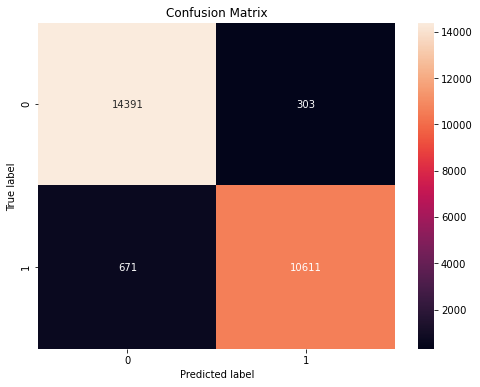

In [250]:
# Matrix de Confusão

XBcm = confusion_matrix(y_test, XBprev)
plt.figure(figsize=(8,6))
sns.heatmap(XBcm,annot=True, fmt='.20g')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [251]:
# Qual o peso de cada feature no resultado final

XBmodel.feature_importances_

array([0.40299717, 0.0429204 , 0.01658608, 0.02175102, 0.01715475,
       0.01932868, 0.0029048 , 0.10756934, 0.02195341, 0.01403738,
       0.02904948, 0.00254425, 0.07539759, 0.0090983 , 0.00715482,
       0.04827542, 0.16127716], dtype=float32)

Text(0.5, 1.0, 'Importância de cada feature')

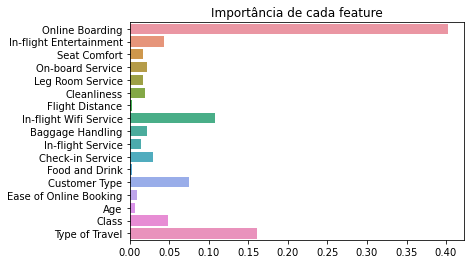

In [252]:
# Gráfico de Importância

XBimportances = pd.Series(data=XBmodel.feature_importances_, index=feature_columns)
sns.barplot(x=XBimportances, y=XBimportances.index, orient='h').set_title('Importância de cada feature')